In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Datasets/Soil.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df=df[['label','temperature','humidity','rainfall','ph','N','P','K']]
df = df.rename(columns={"label":"crop"})

In [5]:
df.head()

,crop,temperature,humidity,rainfall,ph,N,P,K
0,rice,20.879744,82.002744,202.935536,6.502985,90,42,43
1,rice,21.770462,80.319644,226.655537,7.038096,85,58,41
2,rice,23.004459,82.320763,263.964248,7.840207,60,55,44
3,rice,26.491096,80.158363,242.864034,6.980401,74,35,40
4,rice,20.130175,81.604873,262.717340,7.628473,78,42,42


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   crop         2200 non-null   object 
 1   temperature  2200 non-null   float64
 2   humidity     2200 non-null   float64
 3   rainfall     2200 non-null   float64
 4   ph           2200 non-null   float64
 5   N            2200 non-null   int64  
 6   P            2200 non-null   int64  
 7   K            2200 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df.corr()

,temperature,humidity,rainfall,ph,N,P,K
temperature,1.000000,0.205320,-0.030084,-0.017795,0.026504,-0.127541,-0.160387
humidity,0.205320,1.000000,0.094423,-0.008483,0.190688,-0.118734,0.190859
rainfall,-0.030084,0.094423,1.000000,-0.109069,0.059020,-0.063839,-0.053461
ph,-0.017795,-0.008483,-0.109069,1.000000,0.096683,-0.138019,-0.169503
N,0.026504,0.190688,0.059020,0.096683,1.000000,-0.231460,-0.140512
P,-0.127541,-0.118734,-0.063839,-0.138019,-0.231460,1.000000,0.736232
K,-0.160387,0.190859,-0.053461,-0.169503,-0.140512,0.736232,1.000000


## Data Visualization

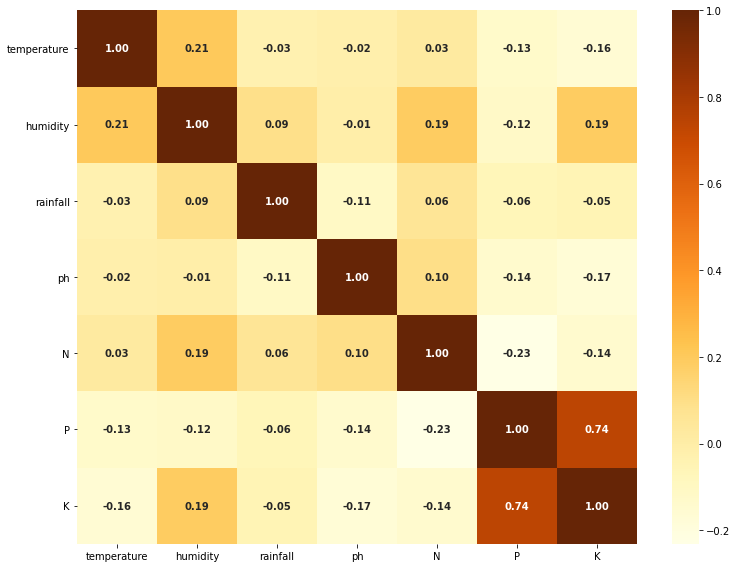

In [8]:
plt.figure(figsize=(11,8))
g=sns.heatmap(df.corr(),cmap='YlOrBr',annot=True,fmt='.2f',annot_kws={'fontsize':10, 'fontweight': 'bold'})
plt.tight_layout(); #plots a heatmap

In [9]:
sns.set_style('darkgrid')

df_lim = df.sample(n=500, random_state=42) #Using random limited data 

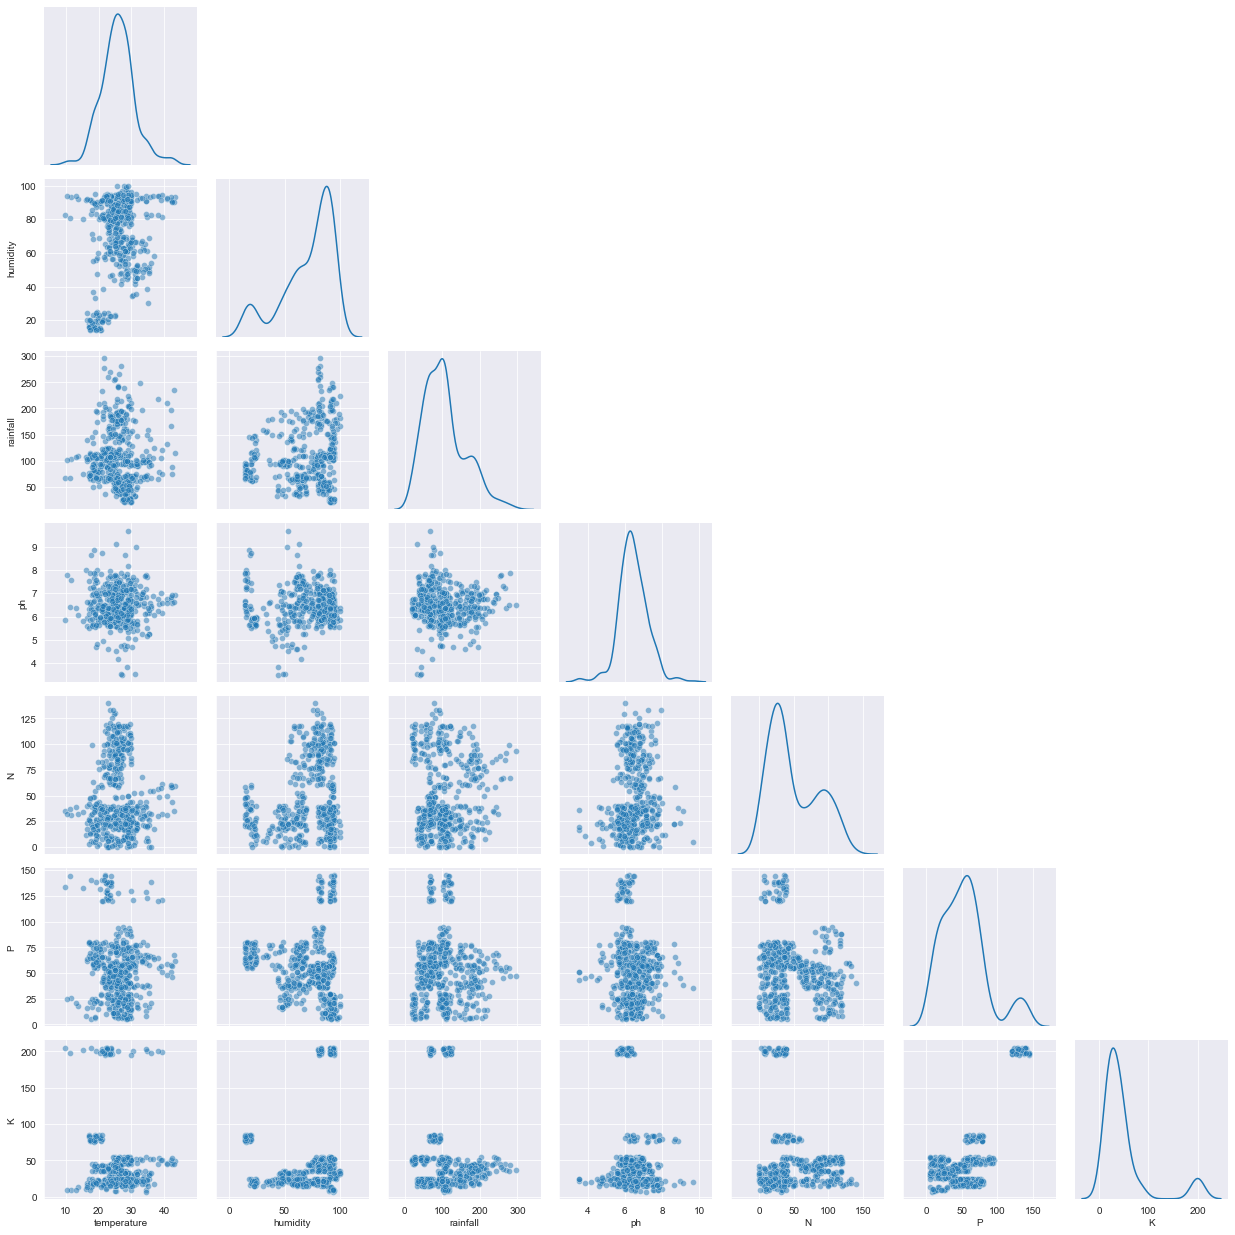

In [10]:
g = sns.PairGrid(df_lim, diag_sharey=False,corner=True);
g.map_offdiag(sns.scatterplot, alpha=.5)
g.map_diag(sns.kdeplot) #plots a pairplot for our data

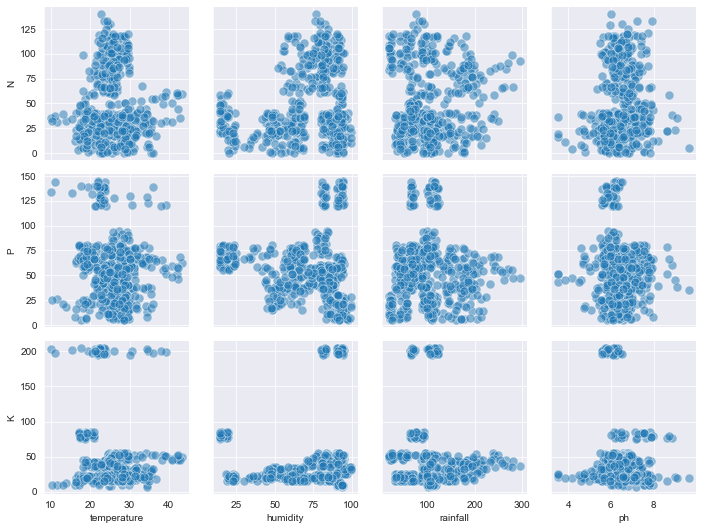

In [11]:
g = sns.PairGrid(df_lim, 
                 x_vars=['temperature', 'humidity', 'rainfall', 'ph'],
                 y_vars=['N', 'P', 'K'],
                 )
g.map(sns.scatterplot, s=80, alpha=.5) #plots relation of target variables with the features

In [12]:
df=df.apply(lambda x:x.str.strip() if x.dtype=="object" else x) #removing white spaces

In [13]:
categorical_data = ['crop']
for label in categorical_data:
    print(label ,': ', len(df[label].unique()))

crop :  22


In [14]:
df['crop'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: crop, dtype: int64

In [15]:
df.head(1)

,crop,temperature,humidity,rainfall,ph,N,P,K
0,rice,20.879744,82.002744,202.935536,6.502985,90,42,43


In [16]:
X=df.iloc[:,0:5].values
y=df.iloc[:,5:].values

In [17]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ohe =  OneHotEncoder(sparse=False, handle_unknown='ignore')
stdsc = StandardScaler()
# performs ohe on crop column and stdsc on temperature, humidity, rainfall and ph
ct = ColumnTransformer([('encoder', ohe, [0]),('scaler', stdsc, [1,2,3,4])], remainder = 'passthrough')

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15,random_state=42)

## Pipeline

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(random_state=0, n_estimators=100)
pipe = make_pipeline(ct, regr)

In [20]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0]),
                                                 ('scaler', StandardScaler(),
                                                  [1, 2, 3, 4])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=0))])

In [21]:
pipe.score(X_test, y_test)

0.9327069118695589

In [22]:
y_pred = pipe.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(y_test, y_pred)))

8.921961152576312


In [24]:
pipe.predict([['rice',20.87, 82, 202.9, 6.5]])

array([[88.03, 43.37, 42.24]])

In [25]:
pipe.predict([['maize',19, 69, 80.72, 6.74]])

array([[73.9 , 44.73, 20.08]])

## Using K-Fold cross validation

In [26]:
from sklearn.model_selection import ShuffleSplit,cross_val_score


cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(pipe, X, y, cv=cv)

array([0.9396287 , 0.94153699, 0.94015104, 0.93224548, 0.93697137])

## Saving the model

In [27]:
import joblib

with open('../Models/soil_health.joblib','wb') as f:
    joblib.dump(pipe,f)